<h2 style = "color:black; text-align:center;"><b>SLR USING STATS MODEL</b></h2>

<h3 style="color:black;"><b>Simple Linear Regression</b></h3>
<p style="color:black;">In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.</p>
<h4 style="color:black;"><b>Step 1: Reading and Understanding the Data</b></h4>
<p style="color:black;">Let's start the following steps:</p>
<p style="color:black;">1. Importing Data using the pandas Library</p>
<p style="color:black;">2. Understanding the Structure of the data</p>

In [2]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas packages

import numpy as np 
import pandas as pd

In [4]:
# Read the given CSV file, and view some sample records

df = pd.read_csv("D:\\Downloads\\archive (4)\\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h4 style="color:black;"><b>Step 2: Visualising the Data</b></h4>
<p style="color:black;">Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.</p>

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

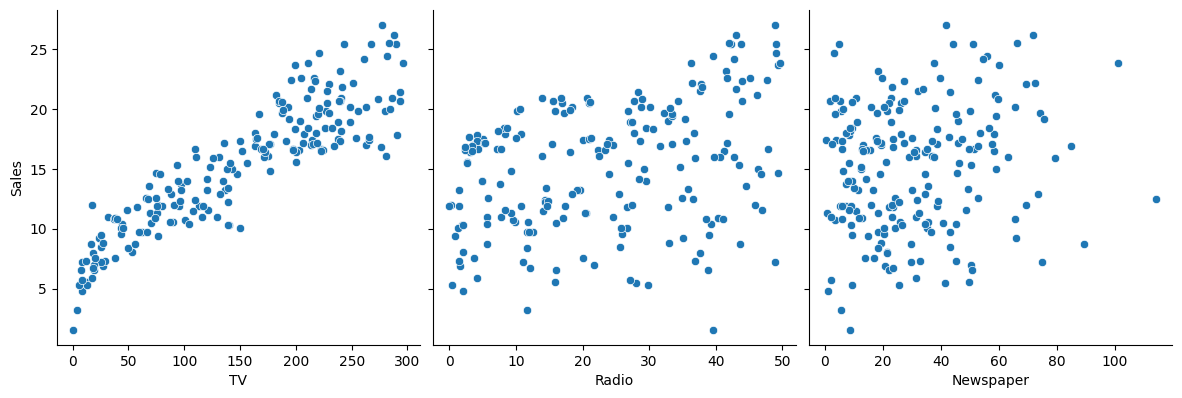

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size = 4, kind='scatter')
plt.show()

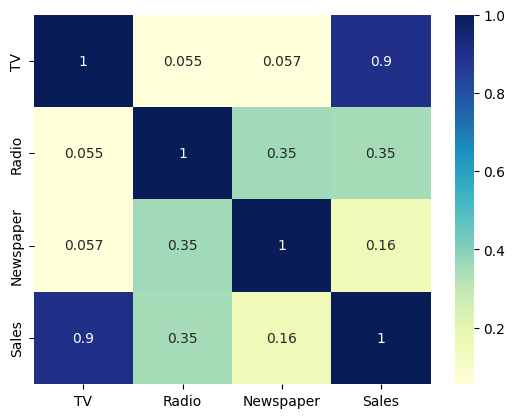

In [10]:
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.show()

<p style = "color:black;">As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.</p>

<h4 style="color:black;"><b>Step 3: Performing Simple Linear Regression</b></h4>
<p style = "color:black;">Equation of linear regression</p>
<p style="color:black;">

$y=c+m1x1+m2x2+...+ mnxn$
 
- $y$  is the response
- $c$  is the intercept
- $m_1$   is the coefficient for the first feature
- $m_n$   is the coefficient for the nth feature
In our case:

$y = c + m_1 \times TV$
 
The  $m$  values are called the model **coefficients** or **model parameters**.</p>

<p style = "color:black;">We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.</p>

In [11]:
X = df['TV']
y = df['Sales']

<h4 style="color:black;"><b>Train-Test Split</b></h4>
<p style="color:black;">You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.</p>

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [13]:
X_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [14]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

<h4 style="color:black;"><b>Building a Linear Model</b></h4>
<p style="color:black;">You first need to import the statsmodel.api library using which you'll perform the linear regression.</p>

In [15]:
!pip install statsmodels

In [16]:
import statsmodels.api as sm

<p style="color:black;">By Default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (ordinary Least Squares) attribute of statsmodels as shown below.</p>

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
# print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.206555
TV       0.054835
dtype: float64

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.08e-50
Time:                        10:30:57   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

<p style="color:black;">Looking at some key statistics from the summary</p>
<p>The values we are concerned with are -</p>

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

<p style="color:black;">1. The coefficient for TV is 0.054, with a very low p value. The coefficient is statistically significant. So the association is not purely by chance.</p>

<p style="color:black;">2. R - squared is 0.80. Meaning that 80% of the variation in Sales is explained by TV. This is a decent R-squared value.</p>

<p style="color:black;">3. F statistic has a very low p value(practically low). Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.</p>

<p style="color:black;">The fit is significant. Let's visualize how well the model fit the data. From the parameters that we get, our linear regression equation becomes:</p>

Sales = 7.20 + 0.054 * TV

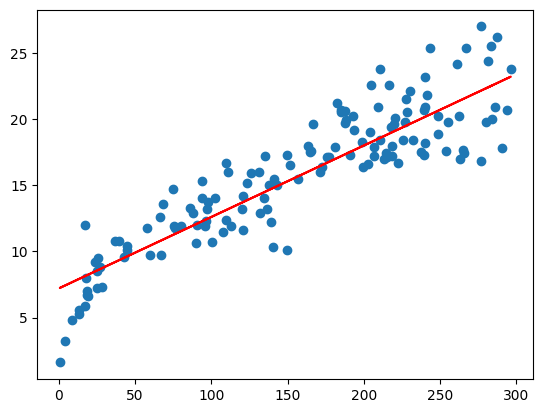

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.20 + 0.054*X_train, 'r')
plt.show()

<h4 style="color:black;"><b>Step 4: Residual analysis</b></h4>
<p style="color:black;">
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.</p>

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

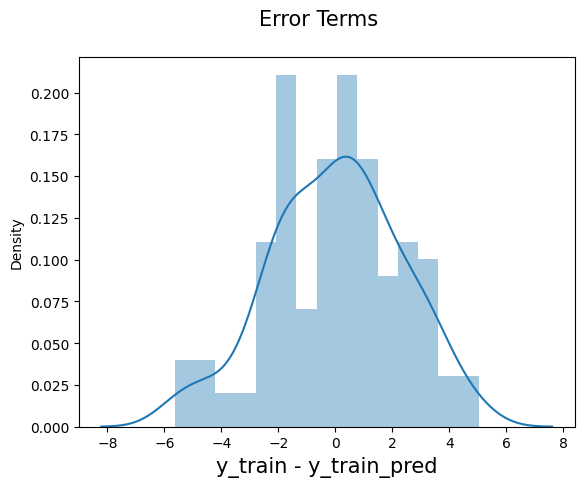

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

<p style="color:black;">The residuals are following the normally distributed with a mean 0. All good!</p>

<p style="color:black;"><b>Looking for patterns in tht residuals</b></p>

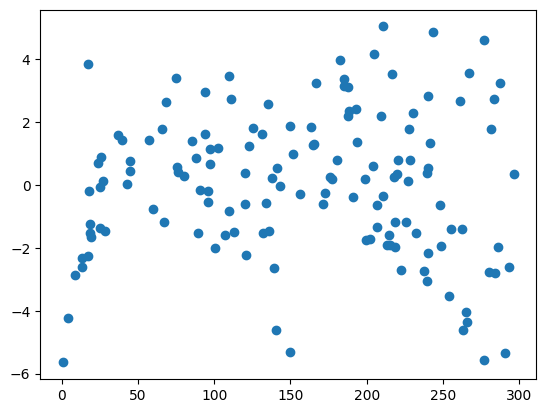

In [23]:
plt.scatter(X_train, res)
plt.show()

<p style="color:black;">We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.</p>
    <p style="color:black;">Although, the variance of residuals increasing with X indices that there is significant variation that this model is unable to explain. As you can see, the regression line is a pretty good fit to the data.</p>

<h4 style="color:black;"><b>Step 5: Predictions on the Test Set</b></h4>
<p style="color:black;">Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.</p>

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

<h5 style="color:black;"><b>Looking at the RMSE</b></h5>

In [27]:
# Returns the mean squared error; we'll take a sqaure root 
np.sqrt(mean_squared_error(y_test, y_pred))

2.27585706980176

<h5 style="color:black;"><b>Checking the R-squared on the test set</b></h5>

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.814855389208679

<h5 style="color:black;"><b>Visualize the fit on the test set</b></h5>

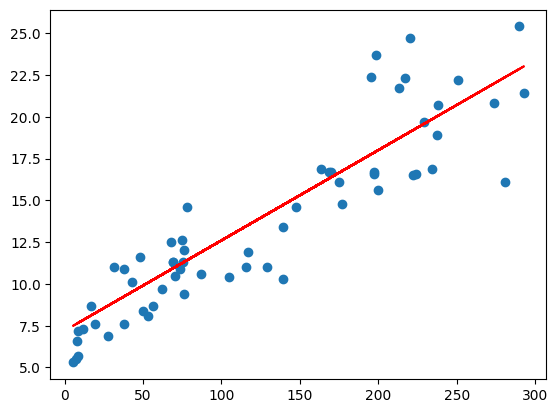

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.20 + 0.054 * X_test, 'r')
plt.show()

<h4 style="color:black;"><b>Linear Regression Using linear_model in sklearn</b></h4>

<p style="color:black;">Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we have already performed a train_test split, we don't need to do it again.
There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.</p>

In [31]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size=.30, random_state=42)

In [32]:
X_train_lm.shape

(140,)

In [33]:
X_train_lm = np.array(X_train_lm).reshape(-1,1)
X_test_lm = np.array(X_test_lm).reshape(-1,1)

In [34]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [35]:
from sklearn.linear_model import LinearRegression

# Representing Linear Regression as lr(creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [36]:
print(lm.intercept_)
print(lm.coef_)

7.206554548173251
[0.05483488]


<p style = "color:black;">The equations get is the same as what we got before!</p>

$Sales = 7.20 + 0.054 * TV  $

<p style = "color:black;">sklearn linear model is useful as it is compatible with a lot of sklearn utilities(cross validation, gridsearch etc.)</p>

In [37]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.89421861]
 [0.89421861 1.        ]]


In [38]:
corrs[0,1] ** 2

0.7996269282192676

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [40]:
# Scikit Learn has these scaling utilities handy
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
# One aspect that you need to take care is that the fit_transform can be performed on 2D arrays only. So you need to reshape your X_train_scaled and y_trained_scaled

X_train_scaled = np.array(X_train).reshape(-1,1)
y_train_scaled = np.array(y_train).reshape(-1,1)

In [42]:
X_train_scaled.shape

(140, 1)

In [43]:
# Create a scaler object using StandardScaler()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [44]:
print(f"Mean and SD for X_train_scaled : {np.mean(X_train_scaled)}, {np.std(X_train_scaled)}")
print(f"Mean and SD for y_train_scaled : {np.mean(y_train_scaled)}, {np.std(y_train_scaled)}")

Mean and SD for X_train_scaled : -2.410769996328911e-16, 1.0
Mean and SD for y_train_scaled : 9.198990775465583e-17, 1.0


In [45]:
# Let's fit the regression line following exactly 
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [46]:
# Check the parameters
lr_scaled.params

array([1.00613962e-16, 8.94218613e-01])

In [47]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.08e-50
Time:                        11:26:26   Log-Likelihood:                -86.121
No. Observations:                 140   AIC:                             176.2
Df Residuals:                     138   BIC:                             182.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e-16      0.038   2.64e-15      1.0